In [ ]:
Machine Learning 
always try to get a function between variables

In [ ]:
support vector machine(SVM)
small dataset and classification 
draw hyperplane by maximizing margins

In [ ]:
Minimize loss function 
Hinge loss (maximize margin classification)
Loss function c(x,y,f(x))=(1-y*f(x))_(positive)

In [ ]:
Example

In [2]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1,6,-1],
    [2,4,-1],
    [6,2,-1],
])

In [58]:
ord('s')
list('sp')
b = np.zeros((10,5))
l = np.array([
    list('Aisen'),
    list('Lucas'),
    list('Mason'),
    list('Ethan'),
    list('Caden'),
    list('Jacob'),
    list('Avery'),
    list('Sofia'),
    list('Emily'),
    list('Chole')
])
for j in range(0,10):   
    for i,a in enumerate(l[j]):
        b[j][i]=ord(l[j][i])

c = np.zeros(5)
k = list('Issac')
for i,a in enumerate(k):
        c[i]=ord(k[i])

In [46]:
X = b
X

array([[ 65., 105., 115., 101., 110.],
       [ 76., 117.,  99.,  97., 115.],
       [ 77.,  97., 115., 111., 110.],
       [ 69., 116., 104.,  97., 110.],
       [ 67.,  97., 100., 101., 110.],
       [ 74.,  97.,  99., 111.,  98.],
       [ 65., 118., 101., 114., 121.],
       [ 83., 111., 102., 105.,  97.],
       [ 69., 109., 105., 108., 121.],
       [ 67., 104., 111., 108., 101.]])

In [42]:
Y = np.array([1,1,1,1,1,1,-1,-1,-1,-1])

In [43]:
# initial weights
w = np.zeros(len(X[0])) 
# learning rate
eta = 1
# how many iterations to train for
epochs = 100000
# store misclassifications
errors = []

# training, gradient descend
for epoch in range(1,epochs):
    error=0
    for i,x in enumerate(X):
        #misclassification
        if (Y[i]*np.dot(X[i],w)) < 1:
            w = w + eta * (X[i]*Y[i]-2*(1/epochs)*w)
            error =1
        else:
            w = w + eta * (-2*(1/epochs)*w)
        

In [44]:
w

array([ 3133.34082841, -4125.86015793,  3800.85880663, -5630.16874814,
        3319.62748012])

In [59]:
np.dot(c[0:3],w[0:3])

191358.7250745126

In [60]:
c[4]

99.0

In [ ]:
# Logistic Regression and Newton's Method

In [ ]:
# Example Use toy data of weight,height,blood pressure to predict diabete

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from patsy import dmatrices

ModuleNotFoundError: No module named 'patsy'

In [4]:
import warnings

In [5]:
# Define sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [24]:
# Preparation
# set the seed
np.random.seed(0)
# convergence threshold tolerance
tol = 1e-8
# iterations
max_iter = 20

In [38]:
# generate data
r = 0.95 #correlation between weights and heights
n = 1000 #observations
sigma = 1 #variance of noises

# model settings
beta_x, beta_z, beta_v = -4, .9, 1 #true beta coefficients
var_x, var_z, var_v = 1, 1, 4 #variance of inputs
formula = 'y ~ x + z + v + np.exp(x) + I(v**2 + z)' #formula

#lets keep x and z closely related (height and weight)
# attention for transpose
x, z = np.random.multivariate_normal([0,0], [[var_x,r],[r,var_z]], n).T
#blood presure
v = np.random.normal(0,var_v,n)**3

In [40]:
# Create dataframe
#create a pandas dataframe (easily parseable object for manipulation)
A = pd.DataFrame({'x' : x, 'z' : z, 'v' : v})
#compute the log odds for our 3 independent variables
#using the sigmoid function 
A['log_odds'] = sigmoid(A[['x','z','v']].dot([beta_x,beta_z,beta_v]) + sigma*np.random.normal(0,1,n))

#The probability distribution of a binomial random variable is called a binomial distribution. 
A['y'] = [np.random.binomial(1,p) for p in A.log_odds]


c:\users\wc145\econ672\hffe\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Machine learning Newton Method 
@catch_singularity
def alt_newton_step(curr, X, lam=None):
    '''One naive step of Newton's Method'''
    
    ## compute necessary objects
    p = np.array(sigmoid(X.dot(curr[:,0])), ndmin=2).T
    W = np.diag((p*(1-p))[:,0]) #here * is not element by element multiply
    hessian = X.T.dot(W).dot(X)
    grad = X.T.dot(y-p)
    
    ## regularization
    if lam:
        #Compute the inverse of a matrix. lam is regulation coefficient
        step = np.dot(np.linalg.inv(hessian + lam*np.eye(curr.shape[0])), grad)
    else:
        step = np.dot(np.linalg.inv(hessian), grad)
        
    ## update our weights
    beta = curr + step
    
    return beta

In [3]:
a = np.array([1,2])
b = np.array([3,4])
a*b

array([3, 8])

In [ ]:
def check_coefs_convergence(beta_old, beta_new, tol, iters):
    '''Checks whether the coefficients have converged in the l-infinity norm.
    Returns True if they have converged, False otherwise.'''
    #calculate the change in the coefficients
    coef_change = np.abs(beta_old - beta_new)
    
    #if change hasn't reached the threshold and we have more iterations to go, keep training
    return not (np.any(coef_change>tol) & (iters < max_iter))

In [ ]:
## initial conditions
#initial coefficients (weight values), 2 copies, we'll update one
beta_old, beta = np.ones((len(X.columns),1)), np.zeros((len(X.columns),1))

#num iterations we've done so far
iter_count = 0
#have we reached convergence?
coefs_converged = False

#if we haven't reached convergence... (training step)
while not coefs_converged:
    
    #set the old coefficients to our current
    beta_old = beta
    #perform a single step of newton's optimization on our data, set our updated beta values
    beta = newton_step(beta, X, lam=lam)
    #increment the number of iterations
    iter_count += 1
    
    #check for convergence between our old and new beta values
    coefs_converged = check_coefs_convergence(beta_old, beta, tol, iter_count)
    
print('Iterations : {}'.format(iter_count))
print('Beta : {}'.format(beta))

In [ ]:
K Means Clustering

In [1]:
#matrix math
import numpy as np
#graphing
import matplotlib.pyplot as plt
#graphing animation
import matplotlib.animation as animation
# read excel
import pandas as pd
from pandas import read_excel

In [2]:
import xlrd

In [3]:
#load textfile dataset (2D data points)
# for each user, how many packets are sent per second and what's the size of a packet
#anomalies (DDOS attempts) will have lots of big packets sent in a short amount of time 
def load_dataset(name):
    return np.loadtxt(name)

In [4]:
#euclidian distance between 2 data points. For as many data points as necessary. 
def euclidian(a, b):
    return np.linalg.norm(a-b)

In [5]:
df = read_excel('Try.xlsx')
df.columns

Index(['Year', 'Name', 'Dept', 'Title', 'Salary'], dtype='object')

In [6]:
# extract first name 
K = 'Amy Davis'
idx = K.find(' ')
P = K[:idx]
P

'Amy'

In [7]:
A = pd.DataFrame({'Name' : list(df.Name), 'Salary' : list(df.Salary)})
B = pd.DataFrame({'Name' : list(df.Name), 'Salary' : list(df.Salary)})

In [8]:
for index in range(len(A.Name)):
    K = A.Name[index]
    idx = K.find(' ')
    P = K[:idx]
    B.Name[index]=P
    B.Salary[index]=A.Salary[index][1:]


In [9]:
# extract each character and trans it to numbers
C = np.zeros((len(B.Name),12))
for index in range(len(B.Name)):
    for idx in range(len(B.Name[index])): 
            C[index][idx]=ord(B.Name[index][idx])  

for index in range(len(B.Name)):
    for idx in range(0,12): 
        if C[index][idx] == 0:
            C[index][idx]=float('nan')
        
        

In [165]:
dataset = C
dataset

array([[ 83., 104.,  97., ...,  nan,  nan,  nan],
       [ 67.,  97., 115., ...,  nan,  nan,  nan],
       [ 66., 114.,  97., ...,  nan,  nan,  nan],
       ...,
       [ 80., 111., 111., ...,  nan,  nan,  nan],
       [ 76., 111., 101., ...,  nan,  nan,  nan],
       [ 77.,  97., 114., ...,  nan,  nan,  nan]])

In [175]:
E = np.array([[0,3,0],[0,0,1],[10,10,10],[11,10,11],[1,1,0],[15,16,17]])
dataset = E

In [176]:
dataset.shape

(6, 3)

In [177]:
def kmeans(k, epsilon=0.1, distance='euclidian'):
    #list to store past centroid
    history_centroids = []
    #set the distance calculation type 
    if distance == 'euclidian':
        dist_method = euclidian
    # dataset = dataset[:, 0:dataset.shape[1] - 1]
    # get the number of rows (instances) and columns (features) from the dataset
    num_instances, num_features = dataset.shape
    #define k centroids (how many clusters do we want to find?) chosen randomly 
    prototypes = dataset[np.random.randint(0, num_instances - 1, size=k)]
    #set these to our list of past centroid (to show progress over time)
    history_centroids.append(prototypes)
    #to keep track of centroid at every iteration
    prototypes_old = np.zeros(prototypes.shape)
    #to store clusters
    belongs_to = np.zeros((num_instances, 1))
    norm = dist_method(prototypes, prototypes_old)
    iteration = 0
    while norm > epsilon:
        iteration += 1
        norm = dist_method(prototypes, prototypes_old)
        #for each instance in the dataset
        for index_instance, instance in enumerate(dataset):
            #define a distance vector of size k
            dist_vec = np.zeros((k,1))
            #for each centroid
            for index_prototype, prototype in enumerate(prototypes):
                #compute the distance between x and centroid
                dist_vec[index_prototype] = dist_method(prototype, instance)
            #find the smallest distance, assign that distance to a cluster
            belongs_to[index_instance, 0] = np.argmin(dist_vec)
        
        tmp_prototypes = np.zeros((k, num_features))
        
        #for each cluster (k of them)
        for index in range(len(prototypes)):
            #get all the points assigned to a cluster
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            #find the mean of those points, this is our new centroid
            prototype = np.nanmean(dataset[instances_close], axis=0)
            #add our new centroid to our new temporary list
            tmp_prototypes[index, :] = prototype
        
        #set the new list to the current list
        prototypes = tmp_prototypes
        
        #add our calculated centroids to our history for plotting
        history_centroids.append(tmp_prototypes)

    #return calculated centroids, history of them all, and assignments for which cluster each datapoint belongs to
    return prototypes, history_centroids, belongs_to

In [178]:
#lets define a plotting algorithm for our dataset and our centroids
def plot(dataset, history_centroids, belongs_to):
    #we'll have 2 colors for each centroid cluster
    colors = ['r', 'g']

    #split our graph by its axis and actual plot
    fig, ax = plt.subplots()

    #for each point in our dataset
    for index in range(dataset.shape[0]):
        #get all the points assigned to a cluster
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        #assign each datapoint in that cluster a color and plot it
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    #lets also log the history of centroids calculated via training
    history_points = []
    #for each centroid ever calculated
    for index, centroids in enumerate(history_centroids):
        #print them all out
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))

                plt.show()

In [ ]:
#train the model on the data
centroids, history_centroids, belongs_to = kmeans(2)
#plot the results
plot(dataset, history_centroids, belongs_to)

In [160]:
centroids

array([[       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [6.16666667, 6.66666667, 6.5       ]])

In [101]:
%matplotlib notebook
def plot_step_by_step(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']

    fig, ax = plt.subplots()

    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))
                
                plt.pause(0.8)

<IPython.core.display.Javascript object>


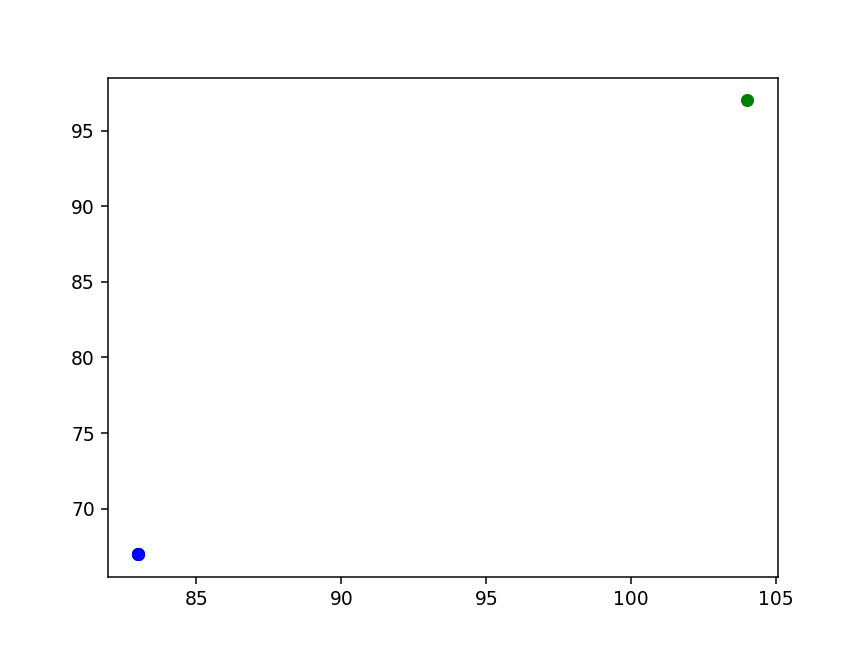

<IPython.core.display.Javascript object>


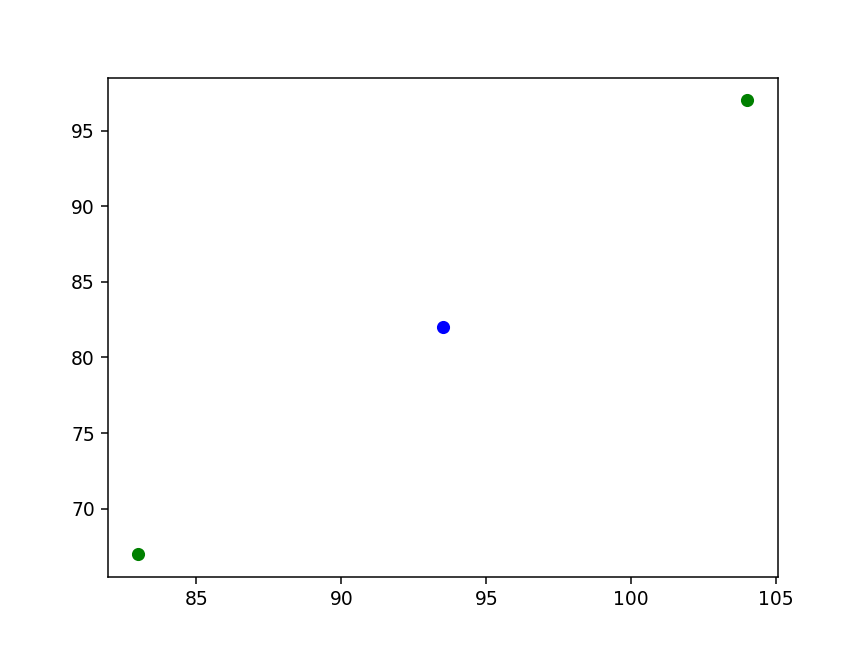

<IPython.core.display.Javascript object>


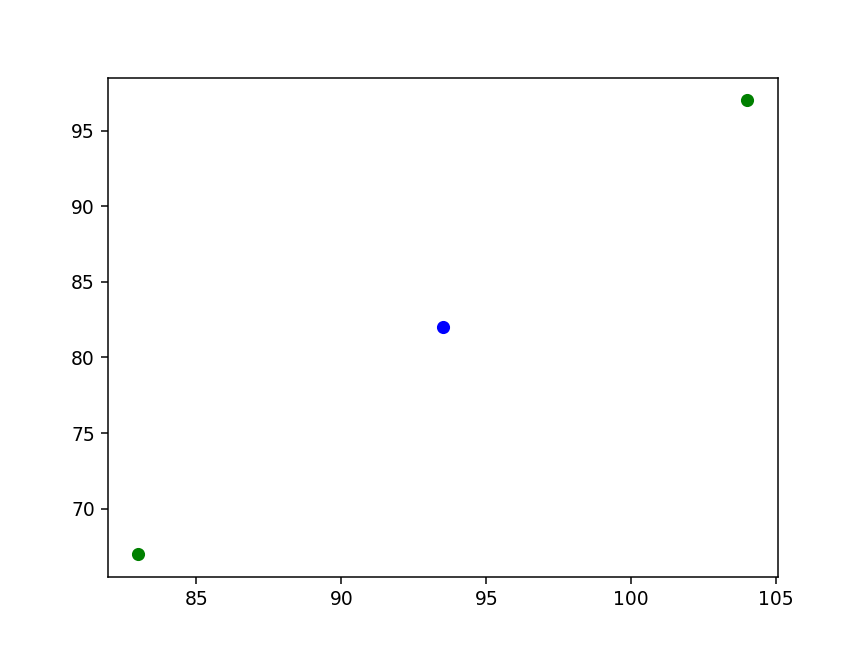

In [85]:
for item in history_centroids:
    plot_step_by_step(dataset, [item], belongs_to)